In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
astropy.coordinates

In [2]:
import healpy as hp 

In [3]:
import seaborn as sns

In [13]:
c = 3.e8
f = 5.e9
wavelength = c / f

In [14]:
faraday = 2. * wavelength**2

In [15]:
faraday * 180. / np.pi

0.41252961249419273

In [16]:
fs = np.linspace(4, 8, 100)*1.e9

In [17]:
waves = c / fs

In [23]:
faradays = 7. * waves**2
faradays *= 180. / np.pi

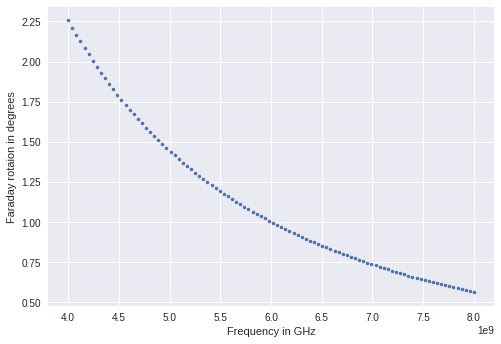

In [24]:
plot(fs, faradays, '.')
ylabel('Faraday rotaion in degrees')
xlabel('Frequency in GHz')

In [27]:
map_radius = 1.5*60.
osc_period = 67.5 / 2.
total_time = 23.65 * 60.
n_scans = math.ceil(total_time / (5.*60.))
scan_duration = total_time / float(n_scans)
phi2 = 2.0 * scan_duration / osc_period
phi1 = np.pi * phi2

In [28]:
22.*osc_period / 60.

12.375

In [29]:
print n_scans

5.0


In [30]:
t = np.arange(scan_duration*25)/25.

In [31]:
n_scans = int(n_scans)
x = np.array([])
y = np.array([])
for i in range(n_scans):
    x = np.concatenate([x, map_radius * np.sin(2.*np.pi*t / osc_period + i*phi1) * np.cos(2.*t/osc_period + i*phi2)])
    y = np.concatenate([y, map_radius * np.sin(2.*np.pi*t / osc_period + i*phi1) * np.sin(2.*t/osc_period + i*phi2)])

In [32]:
xvel = (x[1:] - x[:-1]) / (t[1]-t[0])
yvel = (y[1:] - y[:-1]) / (t[1]-t[0])

In [33]:
print np.max(xvel) * 60 + 15
print np.max(yvel) * 60 + 15.

1020.29753357
1020.29884346


In [34]:
17.6 * 60

1056.0

In [25]:
from astropy.io import fits
import glob

antenna_files = glob.glob('/home/gbtdata/AGBT17A_259_02/Antenna/2017_04_05_0[89]*.fits')
antenna_files.sort()

az = []
el = []
ra = []
dec = []
dmjd = []
for fn in antenna_files:
    f = fits.open(fn)
    h = f[2]
    dmjd.extend(h.data['DMJD'])
    az.extend(h.data['MNT_AZ'])
    el.extend(h.data['MNT_EL'])
    ra.extend(h.data['RAJ2000'])
    dec.extend(h.data['DECJ2000'])
az = np.array(az)
el = np.array(el)
ra = np.array(ra)
dec = np.array(dec)
dmjd = np.array(dmjd)

In [26]:
antenna_files

[]

In [35]:
bins = np.arange(-map_radius, map_radius, 2.5)
stuff = np.histogram2d(x, y, bins=[bins, bins])
histo = stuff[0]

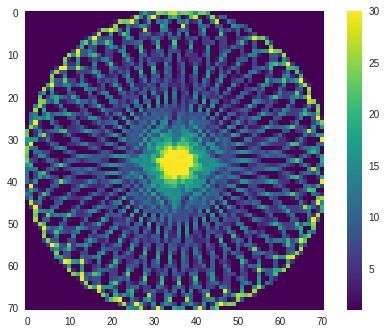

In [36]:
imshow(histo, cmap=cm.viridis)
clim(1, 30)
colorbar()
grid()

In [128]:
xx, yy = meshgrid(bins[:-1], bins[:-1])
circlemask = (xx**2 + yy**2) < (map_radius**2)
mask = histo<1.
bigmask = circlemask & mask

In [132]:
np.sum(bigmask)

9678

In [133]:
np.sum(circlemask)

16191

In [134]:
np.sum(bigmask) / float(np.sum(circlemask))

0.59773948489901796

In [43]:
theta = np.pi/2. - x / 60. * np.pi / 180.
phi = y / 60. * np.pi / 180.

In [44]:
N = hp.nside2npix(4096)

In [45]:
pix = hp.ang2pix(4096, theta, phi)

In [46]:
hits = np.bincount(pix, minlength=N)

In [47]:
hits = hits.astype('float64')

In [48]:
fwhm = 1.6/60. * np.pi / 180.

In [51]:
smhits = hp.smoothing(hits, fwhm=fwhm)

Sigma is 0.679457 arcmin (0.000198 rad) 
-> fwhm is 1.600000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [14]:
mask = hits == 0
hits[mask] = hp.UNSEEN

In [49]:
mask = smhits == 0
smhits[mask] = hp.UNSEEN

NameError: name 'smhits' is not defined

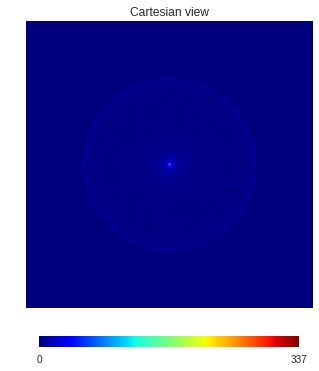

In [50]:
hp.cartview(hits, latra=[-5, 5], lonra=[-5, 5])

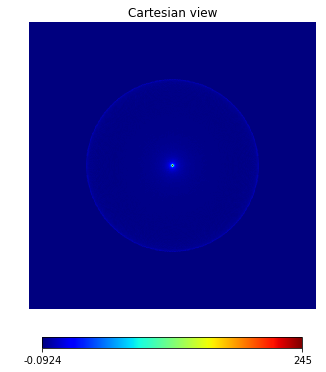

In [17]:
hp.cartview(smhits, latra=[-5, 5], lonra=[-5, 5])

/home/mabitbol/.local/lib/python2.7/site-packages/healpy/projaxes.py:801: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


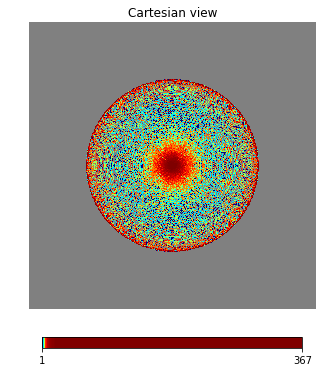

In [18]:
hp.cartview(hits, latra=[-5, 5], lonra=[-5, 5], norm='hist')

In [20]:
mask = smhits < 0.09
smhits[mask] = hp.UNSEEN

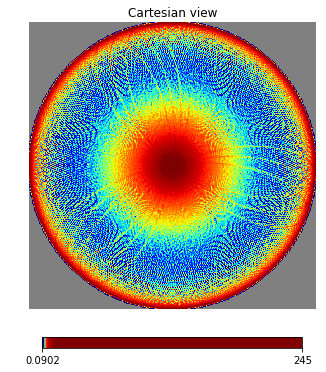

In [22]:
hp.cartview(smhits, latra=[-3, 3], lonra=[-3, 3], norm='hist')

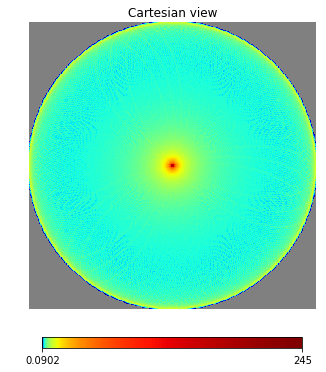

In [23]:
hp.cartview(smhits, latra=[-3, 3], lonra=[-3, 3], norm='log')

In [24]:
mask = smhits < 1.
smhits[mask] = hp.UNSEEN

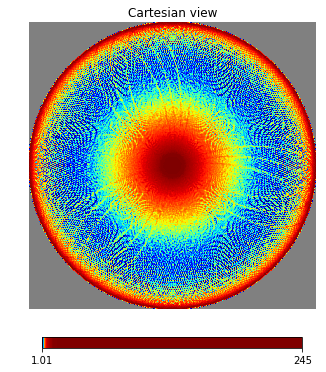

In [25]:
hp.cartview(smhits, latra=[-3, 3], lonra=[-3, 3], norm='hist')

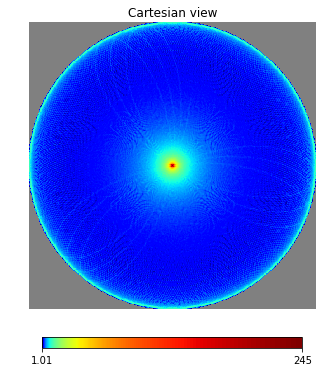

In [26]:
hp.cartview(smhits, latra=[-3, 3], lonra=[-3, 3], norm='log')

In [27]:
smhits2 = hp.ud_grade(smhits, 2048)

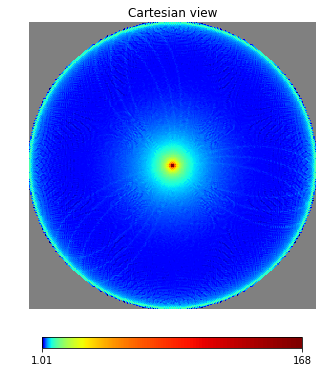

In [28]:
hp.cartview(smhits2, latra=[-3, 3], lonra=[-3, 3], norm='log')

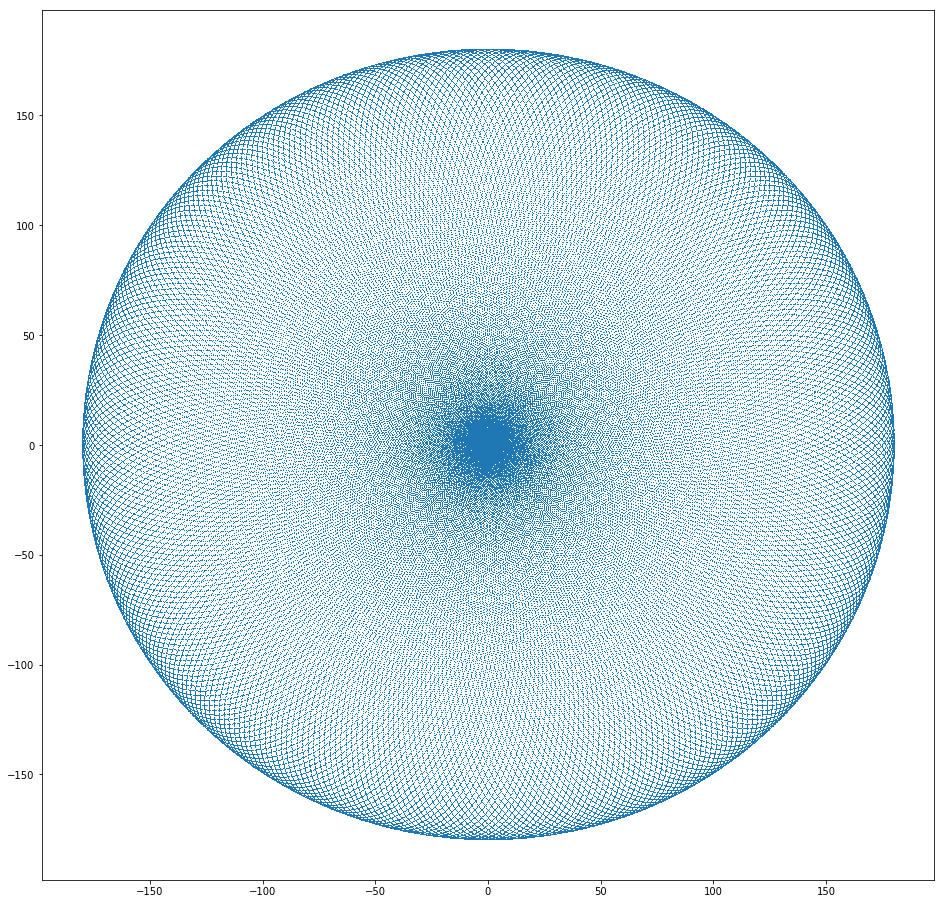

In [6]:
figsize(16,16)
plot(x, y, ',')

(-200, 200)

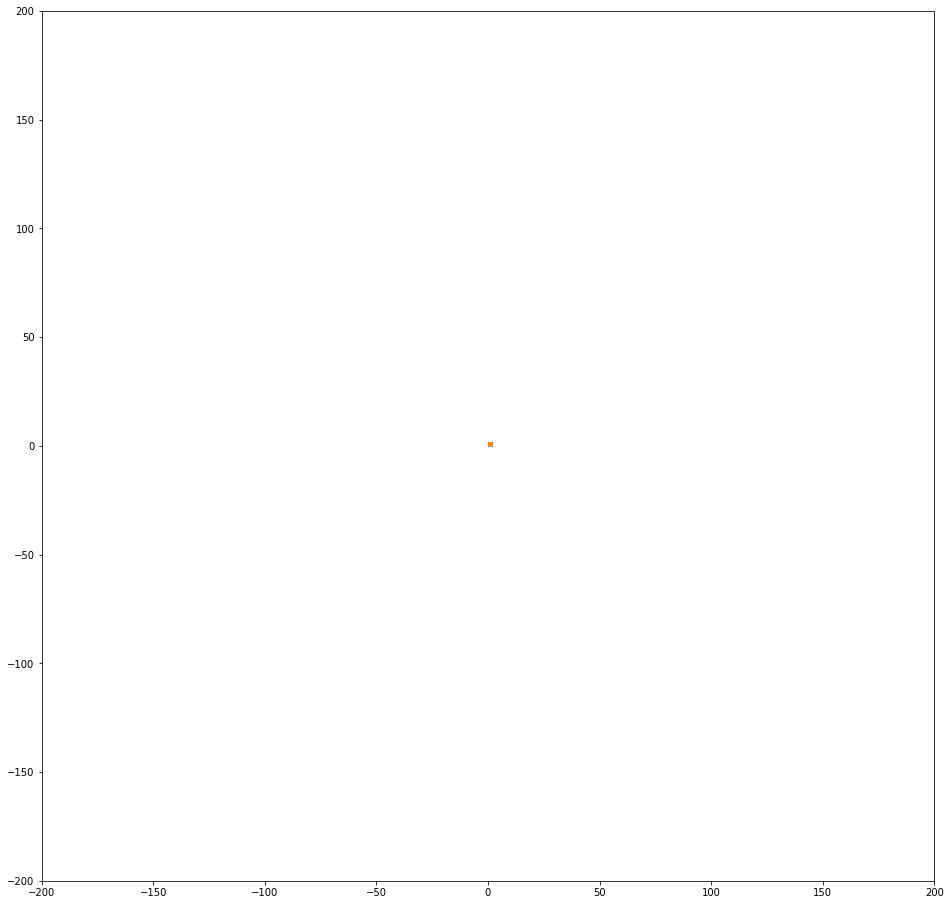

In [45]:
figsize(16, 16)
plot([0, 0, 1.6, 1.6], [0, 1.6, 0, 1.6], '.', markersize=1)
plot(0.8, 0.8, '.', markersize=8)
xlim([-200, 200])
ylim([-200, 200])

In [47]:
from matplotlib.patches import Circle

In [48]:
Circle?

In [ ]:
f, ax = subplots(1,1, figsize=(16, 16))
for (xi, yi) in zip(x,y):
    c = Circle((xi,yi), radius=1.6/2.)
    ax.add_patch(c)

KeyboardInterrupt: 